<a href="https://colab.research.google.com/github/sheamusfitz/DSPS_jFitzgerald/blob/master/HW4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

***Responses by Shea Fitzgerald***

# testing the significance of Dark Matter

In [68]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

import scipy as sp
from scipy import stats


#package I will use for constants and units conversion 
import astropy

from astropy import units as u



Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}{\sqrt r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

$$\frac{GMm}{r^2}=\frac{mv^2}{r}$$

The right hand side is $m$ times centripital acceleration.

$$\frac{GM}{r}=v^2$$

## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/fedhere/DSPS/blob/master/HW4/figures.png?raw=1)





![text](https://github.com/fedhere/DSPS/blob/master/HW4/text.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [0]:
# your code here
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/m31.csv',header= 1, sep = ',')
m31.head()

,#R(kpc,V(km/s),St.dev.,St.error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [0]:
m31= m31.rename(columns={"#R(kpc":"r","V(km/s)":"v", "St.dev.":"dv" , "St.error":"error"})
m31.head()

,r,v,dv,error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [0]:
#m31

In [0]:
m31.describe()

,r,v,dv,error
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [0]:
apparentSizeM31 = 3.167 #deg
distanceM31 = 778 #kpc 
uncertaintyd = 33 #kpc

In [0]:
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.5f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.05527 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [0]:
m31distkpc = distanceM31 * u.kiloparsec
m31distun =  uncertaintyd * u.kiloparsec
print (m31distkpc,m31distun)
print(m31distkpc.to(u.pc))

778.0 kpc 33.0 kpc
778000.0 pc


In [0]:
# your code here
# print("Size of the visible component of Andromeda...: " )

m31size = m31distkpc * m31angS.to(u.rad)/u.rad
print("Diameter of the visible component of Andromeda:{:.2f} ".format(m31size))

Diameter of the visible component of Andromeda:43.00 kpc 


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [0]:
m31.where(m31.r > (m31size)/2).dropna().iloc[0]

r         23.738
v        236.511
dv        11.729
error      1.580
Name: 30, dtype: float64

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

$$v^2=GM/r\Rightarrow r=GMv^{-2}$$

$$\delta r=\left|\frac{\partial r}{\partial v}\delta v\right|$$

$$\delta r=\left|\frac{-2GM}{v^3}\delta v\right|\qquad\text{and}\qquad M=\frac{v^2 r}{G}$$

$$\delta r=\frac{G\frac{v^2r}{G}}{v^3}\delta v=\frac{2r\delta v}{v}$$



In [0]:
def small_at_least(gal, gsize, n):
  tmp = gal.where(gal.r > (gsize)/2 * n).dropna()
  output = tmp.iloc[0]
  output['dr'] = 2*output.r*output.dv/output.v
  return(output)

small_at_least(m31, m31size, 2)

r         70.880000
v        218.489000
dv       132.355000
error     24.657000
dr        85.874551
Name: 36, dtype: float64

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

#### It is impossible to give any meaningful unceratinties to the radii measurements

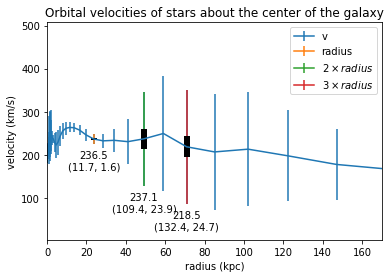

In [59]:
def plotGal(gal,rgal):
  pl.errorbar(gal.r,gal.v,yerr=gal.dv)
  pl.xlim((0,170))
  
  for n in [1,2,3]:
    npoint = small_at_least(gal,rgal,n)
    pl.errorbar(npoint.r,npoint.v,yerr=npoint.dv)
    pl.text(npoint.r,npoint.v-npoint.dv-40,"{:0.1f}\n({:0.1f}, {:0.1f})".
            format(npoint.v,npoint.dv,npoint.error),
            verticalalignment='center',horizontalalignment='center')
    
  for n in [1,2,3]:
    npoint = small_at_least(gal,rgal,n)
    pl.errorbar(npoint.r,npoint.v,yerr=npoint.error,color='k',elinewidth=6)
    
    
  pl.legend(('v','radius','$2\\times radius$','$3\\times radius$'))
  
  pl.xlabel('radius (kpc)')
  pl.ylabel('velocity (km/s)')
  pl.title('Orbital velocities of stars about the center of the galaxy')
  


plotGal(m31,m31size)

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $\color{red}{v \propto 1/\sqrt{r}}$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $\color{red}{v \propto 1/\sqrt{r}}$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

**this** function prints wether the *calculated ratio* is within the $2\sigma$ range of the *measured* ratio

In [0]:
# our dataset of "interest" (plotted above) includes values up to and
# including N=6
def vel_compare(gal,gsize,n):
  output = small_at_least(gal, gsize, n)
  output['predict_v'] = output.r**(-0.5)
  
  baseline = small_at_least(gal,gsize,1)
  baseline['predict_v'] = baseline.r**(-0.5)
  
  data_ratio = output.v/baseline.v
  predict_ratio = output.predict_v/baseline.predict_v
  
  d_data_ratio = data_ratio * ( (output.dv/output.v)**2  +  (baseline.dv/baseline.v)**2 )**0.5
  d_upper_lim = data_ratio + 2*d_data_ratio
  d_lower_lim = data_ratio - 2*d_data_ratio
  
  error_data_ratio = data_ratio * ( (output.error/output.v)**2  +  (baseline.error/baseline.v)**2 )**0.5
  error_upper_lim = data_ratio + 2*error_data_ratio
  error_lower_lim = data_ratio - 2*error_data_ratio
  
  print("using dv first:")
  
  
  print("The predicted ratio of the velocities is {:.4f}, while the measured\n\
  velocity ratio is {:.4f}. The 2σ acceptable range for the actual\n\
  ratio (according to the measured ratio) is between {:.4f} and {:.4f}."
        .format(predict_ratio, data_ratio, d_lower_lim, d_upper_lim))
  
  if predict_ratio <= d_upper_lim and predict_ratio >= d_lower_lim:
    print("The predicted ratio does fall within the 2σ confidence range.")
  else:
    print("The predicted ratio does *not* fall within the 2σ confidence range.")
  
  
  
  print("\nusing 'error' now:")
  
  
  print("The predicted ratio of the velocities is {:.4f}, while the measured\n\
  velocity ratio is {:.4f}. The 2σ acceptable range for the actual\n\
  ratio (according to the measured ratio) is between {:.4f} and {:.4f}."
        .format(predict_ratio, data_ratio, error_lower_lim, error_upper_lim))
  
  if predict_ratio <= error_upper_lim and predict_ratio >= error_lower_lim:
    print("The predicted ratio does fall within the 2σ confidence range.")
  else:
    print("The predicted ratio does *not* fall within the 2σ confidence range.")

  
  #return(data_ratio,predict_ratio)

#print(vel_compare(m31,m31size,3))


for N in range(2,7):
  print("N =",N)
  vel_compare(m31,m31size,N)
  print("\n---\n")
  
  

N = 2
using dv first:
The predicted ratio of the velocities is 0.6945, while the measured
  velocity ratio is 1.0024. The 2σ acceptable range for the actual
  ratio (according to the measured ratio) is between 0.0721 and 1.9326.
The predicted ratio does fall within the 2σ confidence range.

using 'error' now:
The predicted ratio of the velocities is 0.6945, while the measured
  velocity ratio is 1.0024. The 2σ acceptable range for the actual
  ratio (according to the measured ratio) is between 0.7996 and 1.2051.
The predicted ratio does *not* fall within the 2σ confidence range.

---

N = 3
using dv first:
The predicted ratio of the velocities is 0.5787, while the measured
  velocity ratio is 0.9238. The 2σ acceptable range for the actual
  ratio (according to the measured ratio) is between -0.1992 and 2.0468.
The predicted ratio does fall within the 2σ confidence range.

using 'error' now:
The predicted ratio of the velocities is 0.5787, while the measured
  velocity ratio is 0.9238. 

### Discuss!

Apparently this "error budget" is noticeably lower (and therefore more sensitive) than the standard deviation found for the measured velocities. Using these more sensitive values, we see disagreement between predictions and measurements for all values of $N$, while the standard deviations of velocities are too large to pick up these discrepancies.

Therefore, at a 0.95 confidence level, we have found that there is a statistically significant discrepancy between the measured orbital velocities of these stars and their classically predicted orbital velocities.

One immediately obvious source of this discrepancy is dark matter. If the mass distribution of the galaxy extends beyond the visible portion, then this classical prediction outside the radius of the galaxy would not hold. This is because this prediction assumes that the mass enclosed within the orbit of each star is the same.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

N = 2
using dv first:
The predicted ratio of the velocities is 0.6944, while the measured
  velocity ratio is 0.7411. The 2σ acceptable range for the actual
  ratio (according to the measured ratio) is between 0.1355 and 1.3467.
The predicted ratio does fall within the 2σ confidence range.

using 'error' now:
The predicted ratio of the velocities is 0.6944, while the measured
  velocity ratio is 0.7411. The 2σ acceptable range for the actual
  ratio (according to the measured ratio) is between 0.5551 and 0.9271.
The predicted ratio does fall within the 2σ confidence range.

---

N = 3
using dv first:
The predicted ratio of the velocities is 0.5787, while the measured
  velocity ratio is 0.7482. The 2σ acceptable range for the actual
  ratio (according to the measured ratio) is between 0.0487 and 1.4477.
The predicted ratio does fall within the 2σ confidence range.

using 'error' now:
The predicted ratio of the velocities is 0.5787, while the measured
  velocity ratio is 0.7482. The 2σ 

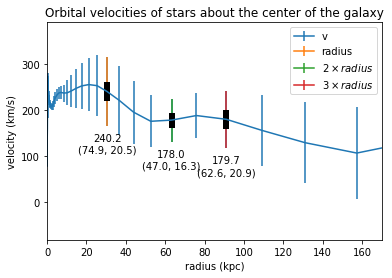

In [60]:
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/mw.csv',header= 1, sep = ',')
mw= mw.rename(columns={"R(kpc)":"r","V(km/s)":"v", "St.dev.":"dv" , "St.error":"error"})
mwsize = 53.5 * u.kpc # From Wikipedia

for N in range(2,7):
  print("N =",N)
  vel_compare(mw,mwsize,N)
  print("\n---\n")
  
plotGal(mw,mwsize)

We no longer find this same statistically significant discrepancy for the Milky Way. This could be due to the fact that the distances and velocities are much harder to measure for the Milky Way, as there is a much higher concentration of visible matter obstructing the measurements.

We are also not taking into account the uncertainty in the radius of the Milky Way, which is quite large.

# Part 3

I'm taking the uniform distribution (as instructed) and the half-normal distribution. I'll use a uniform distribution between 0 and 1 . The Half-Normal distribution will have a scale $\sigma$ of 2.

|             | Uniform | Half-Normal |
|--|--|--|
|**mean**     |0.5      |1.60|
|**variance** |0.0833   |1.45|
|**skewness** |0        |0.995|
|**kurtosis** |1.8      |3.87|

In [0]:
sp.random.seed(924921)

uni_rvs = np.empty(11,dtype='O')
hn_rvs = np.empty(11,dtype='O')

for n in range(1,11):
  uni_rvs[n] = sp.stats.uniform.rvs(size=4**n)
  hn_rvs[n] = sp.stats.halfnorm.rvs(size=4**n,scale=2)
  

In [0]:
uni_moments = np.zeros((5,11)) #1 is the mean, 2 is stdev, 3 is skew, 4 is kurtosis
# yes I left the 0th row empty but I don't want it. I will get confused if I don't
# label things this way.

hn_moments = np.zeros_like(uni_moments)

In [0]:
uni_ana = [0,0.5,0.0833,0,1.8]

hn_ana = [0,1.6,1.45,0.995,3.87]

for n in range(1,11):
  uni_moments[1,n] = mean(uni_rvs[n])
  hn_moments[1,n] = mean(hn_rvs[n])
  
  for d in range(2,5):
    uni_moments[d,n] = np.sum((uni_rvs[n]-mean(uni_rvs[n]))**d)/len(uni_rvs[n])
    hn_moments[d,n] = np.sum((hn_rvs[n]-mean(hn_rvs[n]))**d)/len(hn_rvs[n])
  
  for d in range(3,5):
    uni_moments[d,n] /= uni_moments[2,n]**(d/2)
    hn_moments[d,n] /= hn_moments[2,n]**(d/2)

In [119]:
print(uni_moments,'\n\n',hn_moments)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.43337645e-01  6.08503140e-01  5.84901330e-01
   5.25623481e-01  4.96146599e-01  5.02463969e-01  4.96858307e-01
   5.00955111e-01  5.00301972e-01  5.00224782e-01]
 [ 0.00000000e+00  1.17800183e-01  6.41285028e-02  7.66273840e-02
   7.89144128e-02  8.15117921e-02  8.22526615e-02  8.34469401e-02
   8.33877314e-02  8.35822273e-02  8.32902924e-02]
 [ 0.00000000e+00  5.37759958e-01 -4.42646169e-01 -4.61613158e-01
  -8.36620885e-02 -2.19866040e-02 -5.22323889e-03  1.12558602e-02
  -5.53459279e-03 -3.44552132e-03 -9.01956316e-04]
 [ 0.00000000e+00  1.97524661e+00  1.65087651e+00  1.85301628e+00
   1.88913213e+00  1.78165663e+00  1.80324190e+00  1.80653081e+00
   1.79901855e+00  1.79760740e+00  1.79987478e+00]] 

 [[0.         0.         0.         0.         0.         0.
  0.         0.      

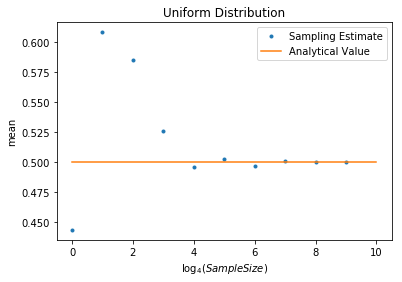

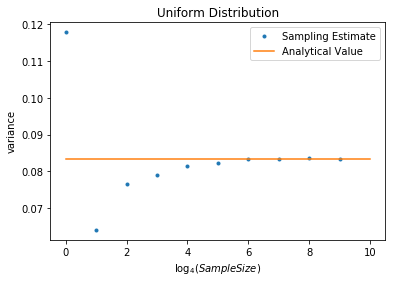

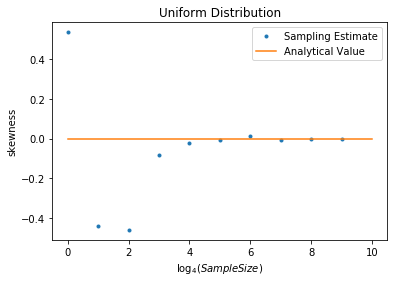

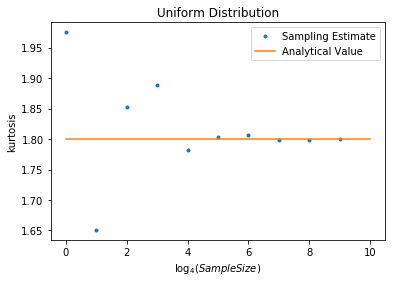

In [149]:
yaxes = ['aaaaaaa','mean','variance','skewness','kurtosis']
for d in range(1,5):
  pl.plot(uni_moments[d,1:],'.')
  pl.plot((0,10),(uni_ana[d],uni_ana[d]))
  pl.title('Uniform Distribution')
  pl.xlabel('$\log_4(Sample Size)$')
  pl.ylabel(yaxes[d])
  pl.legend(('Sampling Estimate','Analytical Value'))
  pl.show()

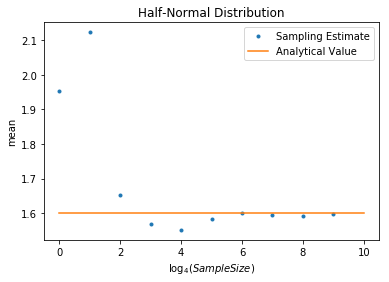

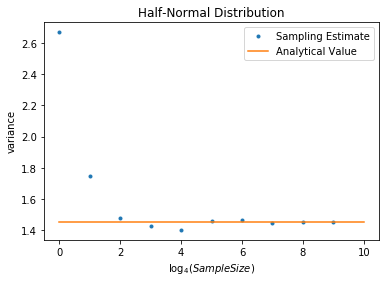

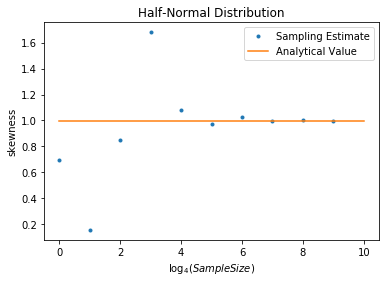

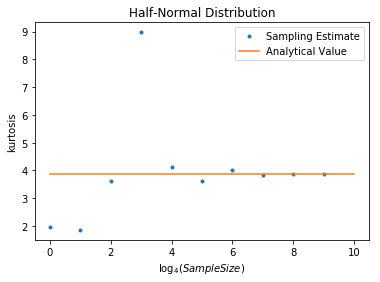

In [150]:
for d in range(1,5):
  pl.plot(hn_moments[d,1:],'.')
  pl.plot((0,10),(hn_ana[d],hn_ana[d]))
  pl.title('Half-Normal Distribution')
  pl.xlabel('$\log_4(Sample Size)$')
  pl.ylabel(yaxes[d])
  pl.legend(('Sampling Estimate','Analytical Value'))
  pl.show()

It is clear from these plots that as the size of a sample increases, the moments of the sample distribution approach the moments of the parent distribution.